___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" 
alt="CLRSWY"></p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:100%; text-align:center; border-radius:10px 10px;">WAY TO REINVENT YOURSELF</p>

<img src=https://i.ibb.co/wJW61Y2/Used-cars.jpg width="700" height="200">

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:200%; text-align:center; border-radius:10px 10px;">The Capstone Project of Data Analytics Module</p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:150%; text-align:center; border-radius:10px 10px;">Car Price Prediction EDA</p>

## Introduction
Welcome to "***AutoScout Data Analysis Project***". This is the capstone project of ***Data Analysis*** Module. **Auto Scout** data which using for this project, scraped from the on-line car trading company in 2019, contains many features of 9 different car models. In this project, you will have the opportunity to apply many commonly used algorithms for Data Cleaning and Exploratory Data Analysis by using many Python libraries such as Numpy, Pandas, Matplotlib, Seaborn, Scipy you will analyze clean dataset.

### Some Reminders on Exploratory data analysis (EDA)

Exploratory data analysis (EDA) is an especially important activity in the routine of a data analyst or scientist. It enables an in depth understanding of the dataset, define or discard hypotheses and create predictive models on a solid basis. It uses data manipulation techniques and several statistical tools to describe and understand the relationship between variables and how these can impact business. By means of EDA, we can obtain meaningful insights that can impact analysis under the following questions (If a checklist is good enough for pilots to use every flight, it’s good enough for data scientists to use with every dataset).
1. What question are you trying to solve (or prove wrong)?
2. What kind of data do you have?
3. What’s missing from the data?
4. Where are the outliers?
5. How can you add, change or remove features to get more out of your data?

**``Exploratory data analysis (EDA)``** is often an **iterative brainstorming process** where you pose a question, review the data, and develop further questions to investigate before beginning model development work. The image below shows how the brainstorming phase is connected with that of understanding the variables and how this in turn is connected again with the brainstorming phase.<br>

<img src=https://i.ibb.co/k0MC950/EDA-Process.png width="300" height="100">

[Image Credit: Andrew D.](https://towardsdatascience.com/exploratory-data-analysis-in-python-a-step-by-step-process-d0dfa6bf94ee)

**``In this context, the project consists of 3 parts in general:``**
* **The first part** is related to 'Data Cleaning'. It deals with Incorrect Headers, Incorrect Format, Anomalies, and Dropping useless columns.
* **The second part** is related to 'Filling Data', in other words 'Imputation'. It deals with Missing Values. Categorical to numeric transformation is done as well.
* **The third part** is related to 'Handling Outliers of Data' via Visualization libraries. So, some insights will be extracted.

**``NOTE:``**  However, you are free to create your own style. You do NOT have to stick to the steps above. We, the DA & DV instructors, recommend you study each part separately to create a source notebook for each part title for your further studies. 

# Dummy Operation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import patches
import seaborn as sns

import warnings

import math

# Statistics functions
from scipy.stats import norm
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import chi2

C:\Users\hbpbn\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Suppressing a warning 
warnings.filterwarnings("ignore") 

# It is a magic function that renders the figure in the notebook
%matplotlib inline 

# Changing the figure size of a seaborn axes 
sns.set(rc={"figure.figsize": (10, 6)})

# The style parameters control properties like the color of the background and whether a grid is enabled by default.
sns.set_style("whitegrid")

# To display maximum columns
pd.set_option('display.max_columns', None)

# To display maximum columns
# pd.set_option('display.max_rows', None)

pd.set_option("display.float_format", lambda x: "%.3f" % x)

In [3]:
df = pd.read_csv("without_outliers_autoscout.csv")
df.head()

,body_type,price_€,vat,km,hp_kW,type,previous_owners,warranty,make,model,body_color,paint_type,upholstery,nr_of_doors,nr_of_seats,gearing_type,engine_displacement_cc,cylinders,weight_kg,drive_chain,fuel,co2e_g,emission_class,comfort&convenience,entertainment&media,extras,safety&security,gears,country_version,consumption_comb,age
0,Sedans,15770.000,VAT deductible,56013.000,66.000,Used,2.000,0.000,Audi,A1,Black,Metallic,Cloth,5.000,5.000,Automatic,1500.000,3.000,1220.000,front,Diesel,99.000,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",7.000,Unknown,3.800,3.000
1,Sedans,14500.000,Price negotiable,80000.000,141.000,Used,1.000,0.000,Audi,A1,Red,Metallic,Cloth,3.000,4.000,Automatic,1800.000,4.000,1255.000,front,Benzine,129.000,Euro 6,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",7.000,Unknown,5.600,2.000
2,Sedans,14640.000,VAT deductible,83450.000,85.000,Used,1.000,0.000,Audi,A1,Black,Metallic,Cloth,4.000,4.000,Automatic,1600.000,3.000,1195.000,front,Diesel,99.000,Euro 6,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",7.000,Unknown,3.800,3.000
3,Sedans,14500.000,VAT deductible,73000.000,66.000,Used,1.000,0.000,Audi,A1,Brown,Metallic,Cloth,3.000,4.000,Automatic,1500.000,3.000,1195.000,front,Diesel,99.000,Euro 6,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",6.000,Unknown,3.800,3.000
4,Sedans,16790.000,VAT deductible,16200.000,66.000,Used,1.000,0.000,Audi,A1,Black,Metallic,Cloth,5.000,5.000,Automatic,1500.000,3.000,1195.000,front,Diesel,109.000,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",6.000,Germany,4.100,3.000


In [11]:
pd.get_dummies(df, columns=["body_type", "vat", "type", "previous_owners",  "make", "model", "warranty", "body_color", "paint_type", "upholstery", "nr_of_doors", "nr_of_seats", "gearing_type", "engine_displacement_cc", "cylinders", "drive_chain", "fuel", "emission_class", "gears", "country_version"], drop_first=True)

,price_€,km,hp_kW,weight_kg,co2e_g,comfort&convenience,entertainment&media,extras,safety&security,consumption_comb,age,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Other,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_VAT deductible,type_Employee's car,type_New,type_Pre-registered,type_Used,previous_owners_1.0,previous_owners_2.0,previous_owners_3.0,previous_owners_4.0,make_Opel,make_Renault,model_A2,model_A3,model_Astra,model_Clio,model_Corsa,model_Duster,model_Espace,model_Insignia,warranty_1.0,body_color_Black,body_color_Blue,body_color_Bronze,body_color_Brown,body_color_Gold,body_color_Green,body_color_Grey,body_color_Orange,body_color_Red,body_color_Silver,body_color_Violet,body_color_White,body_color_Yellow,paint_type_Perl effect,paint_type_Uni/basic,upholstery_Full leather,upholstery_Other,upholstery_Part leather,upholstery_Velour,upholstery_alcantara,nr_of_doors_3.0,nr_of_doors_4.0,nr_of_doors_5.0,nr_of_seats_3.0,nr_of_seats_4.0,nr_of_seats_5.0,nr_of_seats_6.0,nr_of_seats_7.0,gearing_type_Manual,gearing_type_Semi-automatic,engine_displacement_cc_1200.0,engine_displacement_cc_1300.0,engine_displacement_cc_1400.0,engine_displacement_cc_1500.0,engine_displacement_cc_1600.0,engine_displacement_cc_1800.0,engine_displacement_cc_2000.0,engine_displacement_cc_2500.0,engine_displacement_cc_3000.0,cylinders_4.0,cylinders_5.0,cylinders_6.0,cylinders_8.0,drive_chain_front,drive_chain_rear,fuel_Diesel,fuel_Electric,fuel_LPG/CNG,emission_class_Euro 5,emission_class_Euro 6,emission_class_Euro 6c,emission_class_Euro 6d,emission_class_Euro 6d-TEMP,gears_6.0,gears_7.0,gears_8.0,gears_9.0,country_version_Belgium,country_version_Bulgaria,country_version_Croatia,country_version_Czech Republic,country_version_Denmark,country_version_Egypt,country_version_European Union,country_version_France,country_version_Germany,country_version_Hungary,country_version_Italy,country_version_Japan,country_version_Luxembourg,country_version_Netherlands,country_version_Poland,country_version_Romania,country_version_Serbia,country_version_Slovakia,country_version_Slovenia,country_version_Spain,country_version_Sweden,country_version_Switzerland,country_version_Unknown
0,15770.000,56013.000,66.000,1220.000,99.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.800,3.000,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,14500.000,80000.000,141.000,1255.000,129.000,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",5.600,2.000,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,14640.000,83450.000,85.000,1195.000,99.000,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.800,3.000,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,14500.000,73000.000,66.000,1195.000,99.000,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",3.800,3.000,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0

In [12]:
df_dummy = pd.get_dummies(df, columns=["body_type", "vat", "type", "previous_owners",  "make", "model", "warranty", "body_color", "paint_type", "upholstery", "nr_of_doors", "nr_of_seats", "gearing_type", "engine_displacement_cc", "cylinders", "drive_chain", "fuel", "emission_class", "gears", "country_version"], drop_first=True)

In [4]:
df["comfort&convenience"].str.get_dummies(sep=",")

,Air conditioning,Air suspension,Armrest,Automatic climate control,Auxiliary heating,Cruise control,Electric Starter,Electric tailgate,Electrical side mirrors,Electrically adjustable seats,Electrically heated windshield,Heads-up display,Heated steering wheel,Hill Holder,Keyless central door lock,Leather seats,Leather steering wheel,Light sensor,Lumbar support,Massage seats,Multi-function steering wheel,Navigation system,Panorama roof,Park Distance Control,Parking assist system camera,Parking assist system self-steering,Parking assist system sensors front,Parking assist system sensors rear,Power windows,Rain sensor,Seat heating,Seat ventilation,Split rear seats,Start-stop system,Sunroof,Tinted windows,Wind deflector,Windshield
0,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0
2,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0
3,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0
4,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15914,1,0,0,1,0,1,0,0,1,1,0,0,0,1,1,0,1,1,0,1,1,1,0,1,0,0,1,1,1,1,0,0,1,1,0,1,0,0
15915,1,0,0,1,0,1,0,1,1,0,1,1,1,1,1,0,1,1,1,0,0,1,0,1,1,1,1,1,1,1,1,0,0,0,1,0,0,0
15916,1,0,1,1,0,1,0,1,1,0,1,1,1,0,0,0,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1,0,0,1,0,0,0
15917,1,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0


In [13]:
cc_dummy = df["comfort&convenience"].str.get_dummies(sep=",").add_prefix("c&c_")

In [5]:
df["entertainment&media"].str.get_dummies(sep=",")

,Bluetooth,CD player,Digital radio,Hands-free equipment,MP3,On-board computer,Radio,Sound system,Television,USB
0,1,0,0,1,0,1,1,0,0,0
1,1,0,0,1,0,1,1,1,0,0
2,0,0,0,0,1,1,0,0,0,0
3,1,1,0,1,1,1,1,1,0,1
4,1,1,0,1,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
15914,1,0,1,1,0,1,1,0,0,1
15915,1,0,1,1,0,0,1,0,0,1
15916,1,0,0,1,0,1,1,0,0,0
15917,1,0,1,0,0,0,1,0,0,1


In [15]:
em_dummy = df["entertainment&media"].str.get_dummies(sep=",").add_prefix("e&m_")

In [6]:
df["safety&security"].str.get_dummies(sep=",")

,ABS,Adaptive Cruise Control,Adaptive headlights,Alarm system,Blind spot monitor,Central door lock,Central door lock with remote control,Daytime running lights,Driver drowsiness detection,Driver-side airbag,Electronic stability control,Emergency brake assistant,Emergency system,Fog lights,Head airbag,Immobilizer,Isofix,LED Daytime Running Lights,LED Headlights,Lane departure warning system,Night view assist,Passenger-side airbag,Power steering,Rear airbag,Side airbag,Tire pressure monitoring system,Traction control,Traffic sign recognition,Xenon headlights
0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1
1,1,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,1,1,0,1
2,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,1,0,0
3,1,0,0,1,0,0,1,0,1,1,1,0,1,0,1,1,1,0,0,0,0,1,1,0,1,1,0,0,0
4,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15914,1,0,0,0,0,1,1,0,0,1,1,1,0,0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0
15915,1,1,0,0,1,1,0,1,0,1,1,1,0,0,0,1,1,1,1,1,0,1,1,0,1,1,1,1,0
15916,1,1,0,0,1,1,0,1,0,1,1,1,0,0,0,1,1,1,1,1,0,1,1,0,1,0,1,1,0
15917,1,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,1,0,1,0,0,1,1,0,1,1,0,1,0


In [17]:
ss_dummy = df["safety&security"].str.get_dummies(sep=",").add_prefix("s&s_")

In [7]:
df["extras"].str.get_dummies(sep=",")

,Alloy wheels,Cab or rented Car,Catalytic Converter,Handicapped enabled,Right hand drive,Roof rack,Shift paddles,Ski bag,Sliding door,Sport package,Sport seats,Sport suspension,Touch screen,Trailer hitch,Tuned car,Voice Control,Winter tyres
0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15914,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
15915,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
15916,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15917,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [16]:
extras_dummy = df["extras"].str.get_dummies(sep=",").add_prefix("extras_")

In [18]:
df_final = df_dummy.join([cc_dummy, em_dummy, extras_dummy, ss_dummy])

In [20]:
df_final = df_final.drop(columns=["comfort&convenience", "entertainment&media", "extras", "safety&security"])

In [26]:
df_final

,price_€,km,hp_kW,weight_kg,co2e_g,consumption_comb,age,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Other,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_VAT deductible,type_Employee's car,type_New,type_Pre-registered,type_Used,previous_owners_1.0,previous_owners_2.0,previous_owners_3.0,previous_owners_4.0,make_Opel,make_Renault,model_A2,model_A3,model_Astra,model_Clio,model_Corsa,model_Duster,model_Espace,model_Insignia,warranty_1.0,body_color_Black,body_color_Blue,body_color_Bronze,body_color_Brown,body_color_Gold,body_color_Green,body_color_Grey,body_color_Orange,body_color_Red,body_color_Silver,body_color_Violet,body_color_White,body_color_Yellow,paint_type_Perl effect,paint_type_Uni/basic,upholstery_Full leather,upholstery_Other,upholstery_Part leather,upholstery_Velour,upholstery_alcantara,nr_of_doors_3.0,nr_of_doors_4.0,nr_of_doors_5.0,nr_of_seats_3.0,nr_of_seats_4.0,nr_of_seats_5.0,nr_of_seats_6.0,nr_of_seats_7.0,gearing_type_Manual,gearing_type_Semi-automatic,engine_displacement_cc_1200.0,engine_displacement_cc_1300.0,engine_displacement_cc_1400.0,engine_displacement_cc_1500.0,engine_displacement_cc_1600.0,engine_displacement_cc_1800.0,engine_displacement_cc_2000.0,engine_displacement_cc_2500.0,engine_displacement_cc_3000.0,cylinders_4.0,cylinders_5.0,cylinders_6.0,cylinders_8.0,drive_chain_front,drive_chain_rear,fuel_Diesel,fuel_Electric,fuel_LPG/CNG,emission_class_Euro 5,emission_class_Euro 6,emission_class_Euro 6c,emission_class_Euro 6d,emission_class_Euro 6d-TEMP,gears_6.0,gears_7.0,gears_8.0,gears_9.0,country_version_Belgium,country_version_Bulgaria,country_version_Croatia,country_version_Czech Republic,country_version_Denmark,country_version_Egypt,country_version_European Union,country_version_France,country_version_Germany,country_version_Hungary,country_version_Italy,country_version_Japan,country_version_Luxembourg,country_version_Netherlands,country_version_Poland,country_version_Romania,country_version_Serbia,country_version_Slovakia,country_version_Slovenia,country_version_Spain,country_version_Sweden,country_version_Switzerland,country_version_Unknown,c&c_Air conditioning,c&c_Air suspension,c&c_Armrest,c&c_Automatic climate control,c&c_Auxiliary heating,c&c_Cruise control,c&c_Electric Starter,c&c_Electric tailgate,c&c_Electrical side mirrors,c&c_Electrically adjustable seats,c&c_Electrically heated windshield,c&c_Heads-up display,c&c_Heated steering wheel,c&c_Hill Holder,c&c_Keyless central door lock,c&c_Leather seats,c&c_Leather steering wheel,c&c_Light sensor,c&c_Lumbar support,c&c_Massage seats,c&c_Multi-function steering wheel,c&c_Navigation system,c&c_Panorama roof,c&c_Park Distance Control,c&c_Parking assist system camera,c&c_Parking assist system self-steering,c&c_Parking assist system sensors front,c&c_Parking assist system sensors rear,c&c_Power windows,c&c_Rain sensor,c&c_Seat heating,c&c_Seat ventilation,c&c_Split rear seats,c&c_Start-stop system,c&c_Sunroof,c&c_Tinted windows,c&c_Wind deflector,c&c_Windshield,e&m_Bluetooth,e&m_CD player,e&m_Digital radio,e&m_Hands-free equipment,e&m_MP3,e&m_On-board computer,e&m_Radio,e&m_Sound system,e&m_Television,e&m_USB,extras_Alloy wheels,extras_Cab or rented Car,extras_Catalytic Converter,extras_Handicapped enabled,extras_Right hand drive,extras_Roof rack,extras_Shift paddles,extras_Ski bag,extras_Sliding door,extras_Sport package,extras_Sport seats,extras_Sport suspension,extras_Touch screen,extras_Trailer hitch,extras_Tuned car,extras_Voice Control,extras_Winter tyres,s&s_ABS,s&s_Adaptive Cruise Control,s&s_Adaptive headlights,s&s_Alarm system,s&s_Blind spot monitor,s&s_Central door lock,s&s_Central door lock with remote control,s&s_Daytime running lights,s&s_Driver drowsiness detection,s&s_Driver-side airbag,s&s_Electronic stability control,s&s_Emergency brake assistant,s&s_Emergency system,s&s_Fog lights,s&s_Head airbag,s&s_Immobilizer,s&s_Isofix,s&s_LED Daytime Running Lights,s&s_LED Headlights,

<AxesSubplot:>

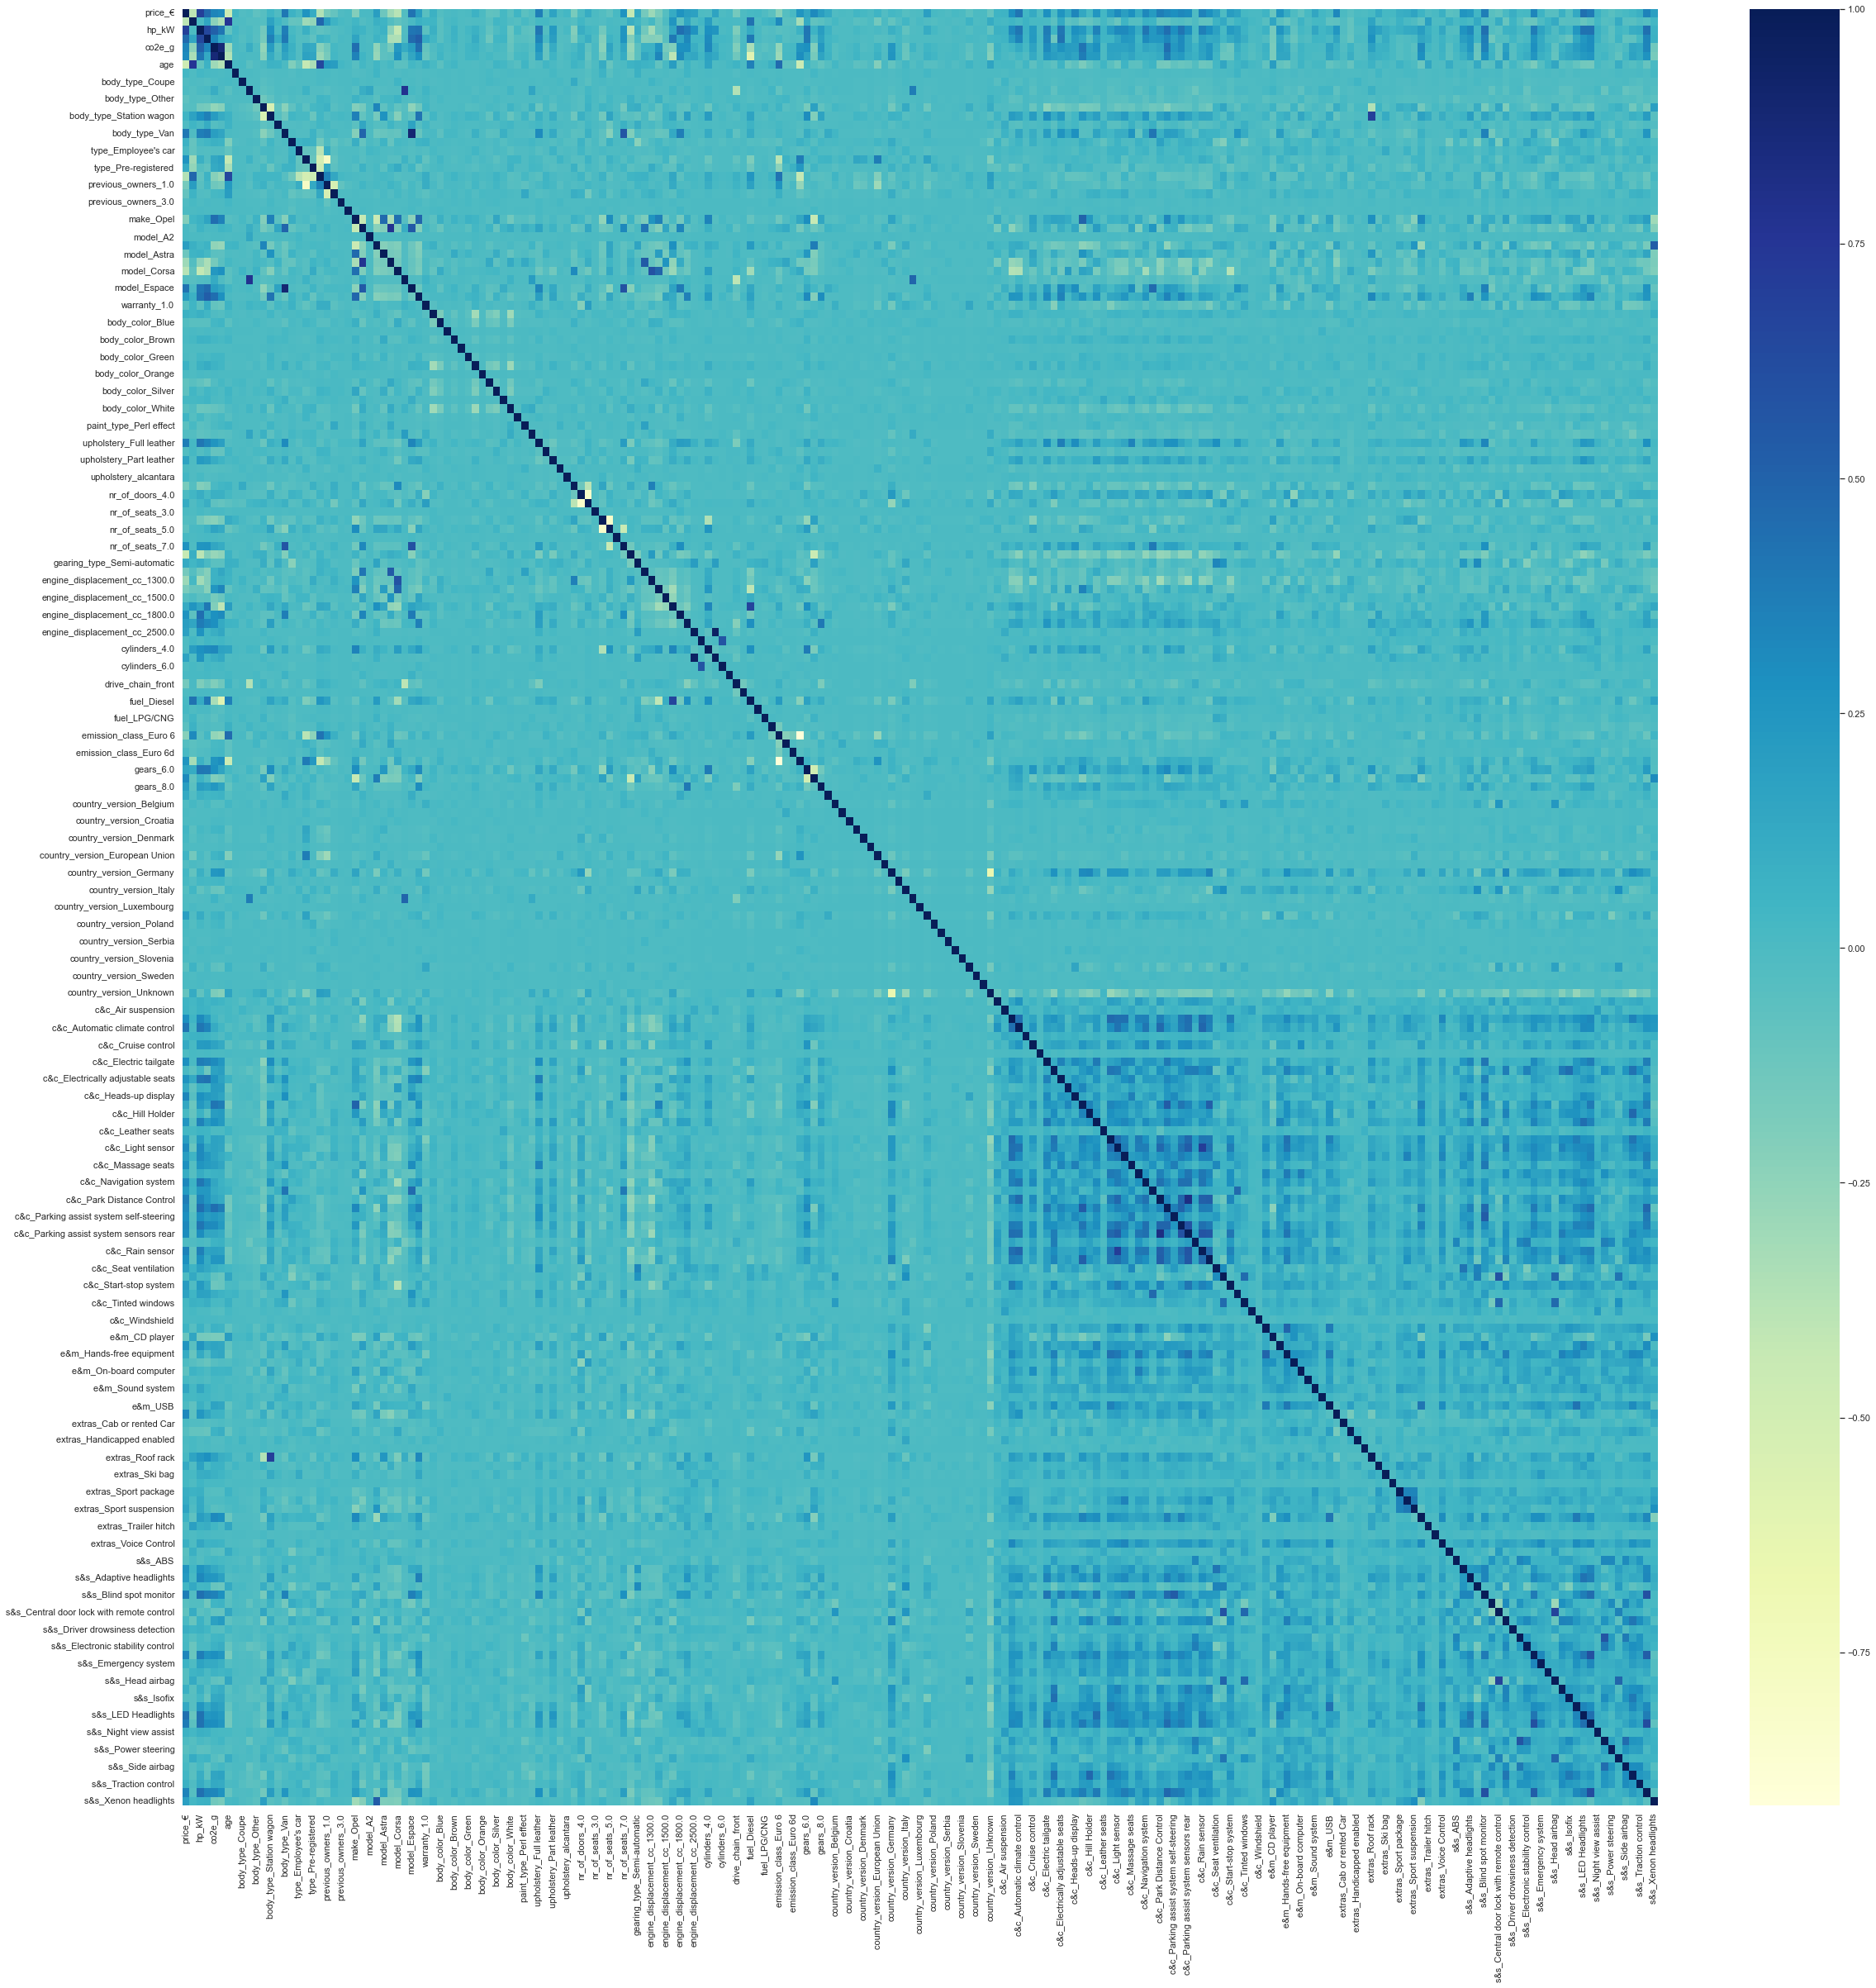

In [24]:
plt.figure(figsize=(40, 40))
sns.heatmap(df_final.corr(), cmap="YlGnBu")

In [25]:
df.to_csv("auto_scout_getdummied", index=False)

In [ ]:
df.extras.str.get_dummies